In [2]:
using Pkg; Pkg.instantiate();

     Cloning git-repo `https://github.com/Marc-3d/LIBTIFF.jl.git`
   Installed Gettext_jll ───────────────── v0.21.0+0
   Installed Libmount_jll ──────────────── v2.35.0+0
   Installed DocStringExtensions ───────── v0.8.5
   Installed OffsetArrays ──────────────── v1.10.7
   Installed Xorg_libX11_jll ───────────── v1.6.9+4
   Installed OpenSpecFun_jll ───────────── v0.5.5+0
   Installed Crayons ───────────────────── v4.0.4
   Installed PooledArrays ──────────────── v1.3.0
   Installed Media ─────────────────────── v0.5.0
   Installed Xorg_libxcb_jll ───────────── v1.13.0+3
   Installed Hexagons ──────────────────── v0.2.0
   Installed IrrationalConstants ───────── v0.1.0
   Installed DataAPI ───────────────────── v1.9.0
   Installed Colors ────────────────────── v0.12.8
   Installed KernelDensity ─────────────── v0.6.3
   Installed Fontconfig_jll ────────────── v2.13.93+0
   Installed LogExpFunctions ───────────── v0.3.3
   Installed Fontconfig ────────────────── v0.4.0
   Installed XS

  ✓ OpenLibm_jll
  ✓ Graphite2_jll
  ✓ Compat
  ✓ Xorg_xtrans_jll
  ✓ Libmount_jll
  ✓ FillArrays
  ✓ AbstractFFTs
  ✓ Hexagons
  ✓ CompilerSupportLibraries_jll
  ✓ Rmath_jll
  ✓ OrderedCollections
  ✓ Xorg_libXau_jll
  ✓ WoodburyMatrices
  ✓ Measures
  ✓ IteratorInterfaceExtensions
  ✓ NaNMath
  ✓ Libuuid_jll
  ✓ IntelOpenMP_jll
  ✓ LZO_jll
  ✓ Xorg_libpthread_stubs_jll
  ✓ libpng_jll
  ✓ FriBidi_jll
  ✓ Distances
  ✓ Libffi_jll
  ✓ Libiconv_jll
  ✓ Expat_jll
  ✓ Missings
  ✓ Showoff
  ✓ Ratios
  ✓ PooledArrays
  ✓ OffsetArrays
  ✓ Media
  ✓ Libgcrypt_jll
  ✓ FreeType2_jll
  ✓ ChainRulesCore
  ✓ OpenSpecFun_jll
  ✓ AxisAlgorithms
  ✓ Rmath
  ✓ TableTraits
  ✓ Loess
  ✓ FileIO
  ✓ MKL_jll
  ✓ XML2_jll
  ✓ CategoricalArrays
  ✓ Juno
  ✓ DataStructures
  ✓ Fontconfig_jll
  ✓ Tables
  ✓ StaticArrays
  ✓ SortingAlgorithms
  ✓ LogExpFunctions
  ✓ Fontconfig
  ✓ XSLT_jll
  ✓ Gettext_jll
  ✓ QuadGK
  ✓ Contour
  ✓ Xorg_libxcb_jll
  ✓ Glib_jll
  ✓ StatsBase
  ✓ Xorg_libX11_jll
  ✓ CoupledField

In [3]:
# Importing all packages required for the accuracy evaluation of PIV3D
using quickPIV
using DataFrames, Gadfly, Measures, Compose

# these imports are needed to export Gadfly plots to PDF. Sometimes I get an error related to Pango, I 
# have been ignoring the error. Just re-run the cell to make the error message disappear
import Cairo
import Fontconfig 

# Globally creating the Gadfly theme for the plots
th = Gadfly.Theme( grid_color="grey87",
                   grid_line_style=:solid,
                   grid_line_width=0.1mm,

                   panel_fill="white",
                   panel_stroke="black",

                   line_width=0.3mm, 

                   minor_label_font_size=4mm,
                   major_label_font_size=4mm,

                   errorbar_cap_length=1.5mm,
                   default_color="salmon",

                   stroke_color=x->"teal",
                   key_position=:none,
                 );

### 2D PIV evaluation: Interrogation Area size and number of Particles in Synthetic Images

In [26]:
# (2,2) translation
tp = quickPIV.setTransformParameters( means=( 2.0, 2.0 ), vars=( eps(Float64), eps(Float64) ), cov_ratio=(0.0,) ); 

# PIV: interArea VAR, searchMargin 0, no multi-pass, gaussian subpixel approximation. 
pp = quickPIV.setPIVParameters( corr="fft", interSize=25, searchMargin=0, peak="gaussian", sigNoise="", mpass=1 ); 

# Evaluating interrogation size, between 1 and 20, metaloop 19, repeats = 1000
mp = quickPIV.setMetaParameters( metaloop=39, var=:interSize, min=1.0, max=40.0, repeats=100 ); 

IAevaluation = DataFrame(); 

# Evaluating interrogation size at 3 different number of Particles in the synthetic images. 
for numParticles in [ 1000, 5000, 10000 ]
    
    sp = quickPIV.setSynthParameters( w=200, h=200, d=1, dens=0, n=numParticles, i0=255.0, dt=2.0, th=Inf, err=255.0*0.001 );
    
    _, results = quickPIV.evaluate( mp, sp, pp, tp, silent=true ); 
    
    # subplot title
    results.alg   = repeat( ["#particles $(numParticles)",], size( results, 1 ) );
    # errorbar top and low values
    results.up_xe = results[:,:mean_bias] .+ results[:,:mean_error]./2;
    results.do_xe = results[:,:mean_bias] .- results[:,:mean_error]./2;
    
    # concatenating result into one DataFrame (IAevaluation)
    IAevaluation  = vcat( IAevaluation, results )
end

GC.gc()


2D PIV evaluation of interSize
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,
variable values: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0]

2D PIV evaluation of interSize
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,
variable values: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0]

2D PIV evaluation of interSize
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,
variable values: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0

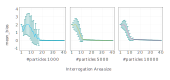

In [27]:
Gadfly.set_default_plot_size( 170mm, 80mm ); 

xlbl = Gadfly.Guide.xlabel( "Interrogation Area size"        , orientation=:horizontal )
ytck = Gadfly.Guide.yticks( label=true, ticks=0:0.5:2.5      , orientation=:horizontal )
xtck = Gadfly.Guide.xticks( label=true, ticks=[1,10,20,30,40], orientation=:horizontal )
ytck = Gadfly.Guide.yticks( label=true, ticks=0.0:0.1:0.7    , orientation=:horizontal )


p1 = Gadfly.plot( IAevaluation, xgroup=:alg, x=:var, y=:mean_bias,  #size =:rand_ex,
                  th, xlbl,
                  Geom.subplot_grid( Geom.line, Geom.yerrorbar, xtck ),
                  ymin=:do_xe, 
                  ymax=:up_xe,
                  color=:alg,
                )

false && Compose.draw( Compose.PDF( "IAsize2D.pdf", 170mm, 80mm, dpi=250 ), p1  ); 

p1

### 3D PIV evaluation: Interrogation Area size and number of Particles in Synthetic Images

In [7]:
# (2,2) translation.
tp = quickPIV.setTransformParameters( means=( 2.0, 2.0, 2.0 ), vars=( eps(Float64), eps(Float64), eps(Float64) ),
                                   cov_ratio=( 0.0, 0.0, 0.0 ) ); 

# PIV: interArea VAR, searchMargin 0, no multi-pass, gaussian subpixel approximation. 
pp = quickPIV.setPIVParameters( corr="fft", interSize=25, searchMargin=0, peak="gaussian", sigNoise="", mpass=1 ); 

# Evaluating interrogation area size, between 1 and 20, metaloop 19, repeats = 1000.
mp = quickPIV.setMetaParameters( metaloop=39, var=:interSize, min=1.0, max=40.0, repeats=5 ); 

IAevaluation3d = DataFrame(); 

# Evaluating interrogation area size at 3 different number of Particles in the synthetic images. 
for numParticles in [ 25000, 100000, 500000 ]
    
    sp = quickPIV.setSynthParameters( w=200, h=200, d=200, dens=0, n=numParticles, i0=255.0, dt=2.0, th=Inf, err=255.0*0.001 );
    
    _, results = quickPIV.evaluate( mp, sp, pp, tp, silent=true ); 
    
    # subplot title
    results.alg   = repeat( ["#particles $(numParticles)",], size( results, 1 ) );
    # errorbar top and low values
    results.up_xe = results[:,:mean_bias] .+ results[:,:mean_error]./2;
    results.do_xe = results[:,:mean_bias] .- results[:,:mean_error]./2;
    
    # concatenating result into one DataFrame (IAevaluation)
    IAevaluation3d  = vcat( IAevaluation3d, results )
end

GC.gc()


3D PIV evaluation of interSize
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,
variable values: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0]

3D PIV evaluation of interSize
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,
variable values: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0]

3D PIV evaluation of interSize
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,
variable values: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0

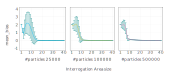

In [8]:
Gadfly.set_default_plot_size( 170mm, 80mm ); 

xlbl = Gadfly.Guide.xlabel("Interrogation Area size"        , orientation=:horizontal )
ytck = Gadfly.Guide.yticks(label=true, ticks=0:0.5:2.5      , orientation=:horizontal )
xtck = Gadfly.Guide.xticks(label=true, ticks=[1,10,20,30,40], orientation=:horizontal )

p31 = Gadfly.plot( IAevaluation3d, xgroup=:alg, x=:var, y=:mean_bias,  #size =:rand_ex,
                  th, xlbl,
                  Geom.subplot_grid( Geom.line, Geom.yerrorbar, xtck ),
                  ymin=:do_xe, 
                  ymax=:up_xe,
                  color=:alg, 
                 )

false && Compose.draw( Compose.PDF( "IAsize3D.pdf", 170mm, 80mm, dpi=250 ), p31  ); 

p31

### 2D PIV evaluation: Translation Strength and search margin size

In [10]:
# 200 x 200 image with 1000 particles of radius 2.0. Density of 30 particles per interrogation area
imax = 255.0; 
sp = quickPIV.setSynthParameters( w=200, h=200, d=1, dens=30, i0=255.0, dt=2.0, th=Inf, err=255.0*0.001 );

# translation strength VAR
tp = quickPIV.setTransformParameters( means=( 1.0, 1.0 ), vars=( eps(Float64), eps(Float64) ), cov_ratio=(0.0,) ); 

# Evaluating translation strength, between 0.0 and 3.5, metaloop 70, repeats = 1000
mp = quickPIV.setMetaParameters( metaloop=35, var=:means, min=0.0, max=3.5, repeats=100 ); 

GSPevaluation  = [] # Evaluation with Gaussian subpixel approximation
NGSPevaluation = [] # Evaluation without Gaussian subpixel approximation

# Evaluating translation strength at 3 different search margin sizes
for SM in [ 0, 2, 4 ]
    
    println( SM )
    
    pp_g  =  quickPIV.setPIVParameters( corr="fft", interSize=16, searchMargin=SM, peak="gaussian", sigNoise="", mpass=1 ); 
    _, resultG  = quickPIV.evaluate( mp, sp, pp_g, tp, silent=true );
    
    resultG.alg   = repeat( ["search margin $(SM)",], size( resultG, 1 ) ); 
    resultG.gaus  = repeat( ["gauss subpixel" ,]    , size( resultG, 1 ) ); 
    resultG.var1  = [ x[1] for x in resultG[:,:var] ]
    resultG.up_xe = resultG[:,:mean_bias] .+ resultG[:,:mean_error]./2;
    resultG.do_xe = resultG[:,:mean_bias] .- resultG[:,:mean_error]./2;
    

    pp_ng = quickPIV.setPIVParameters( corr="fft", interSize=16, searchMargin=SM, peak="", sigNoise="", mpass=1 ); 
    _, resultNG = quickPIV.evaluate( mp, sp, pp_ng, tp, silent=true );
    
    resultNG.alg   = repeat( ["search margin $(SM)",], size( resultNG, 1 ) ); 
    resultNG.gaus  = repeat( ["no subpixel",]        , size( resultNG, 1 ) ); 
    resultNG.var1  = [ x[1] for x in resultNG[:,:var] ]
    resultNG.up_xe = resultNG[:,:mean_bias] .+ resultNG[:,:mean_error]./2;
    resultNG.do_xe = resultNG[:,:mean_bias] .- resultNG[:,:mean_error]./2;
    
    # Instead of merging the data into a DataFrame, results are pushed into an array so that
    # each evaluation result is accessible independently. Creating the figures from a combined
    # DataFrame through the subplot interface didn't work for me.
    push!( GSPevaluation , resultG  ) 
    push!( NGSPevaluation, resultNG )
end

GC.gc()

0

2D PIV evaluation of means
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,
variable values: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5]

2D PIV evaluation of means
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,
variable values: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5]
2

2D PIV evaluation of means
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,
variable values: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5]

2D PIV evaluation of

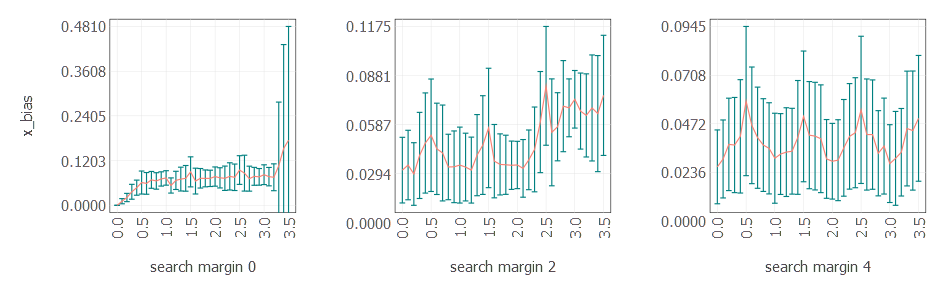

In [11]:
Gadfly.set_default_plot_size( 250mm, 80mm ); 

# G for results with gaussian or NG for results without gaussian
whatToPlot = "G"
data1 = (whatToPlot == "G") ? GSPevaluation[1] : NGSPevaluation[1]
data2 = (whatToPlot == "G") ? GSPevaluation[2] : NGSPevaluation[2]
data3 = (whatToPlot == "G") ? GSPevaluation[3] : NGSPevaluation[3]


xticks  = Guide.xticks( label=true, ticks=collect(0:0.5:3.5), orientation=:vertical );
yticks1 = Guide.yticks( label=true, ticks=round.(collect(0.0:maximum(data1.up_xe)/4:maximum(data1.up_xe)),digits=4), orientation=:horizontal )
yticks2 = Guide.yticks( label=true, ticks=round.(collect(0.0:maximum(data2.up_xe)/4:maximum(data2.up_xe)),digits=4), orientation=:horizontal )
yticks3 = Guide.yticks( label=true, ticks=round.(collect(0.0:maximum(data3.up_xe)/4:maximum(data3.up_xe)),digits=4), orientation=:horizontal )

h1 = Compose.hstack(
    plot( 
        data1, th, x=:var1, y=:mean_bias,
        Geom.line, Geom.yerrorbar, ymin=:do_xe, ymax=:up_xe,
        Guide.xlabel("search margin 0"),
        xticks, yticks1,
        Coord.Cartesian( ymax=maximum(data1.up_xe), ymin=0 ), #minimum(gaussDF1.do_xe) ),
    ), 
    plot( 
        data2, th, x=:var1, y=:mean_bias,
        Geom.line, Geom.yerrorbar, ymin=:do_xe, ymax=:up_xe, 
        Guide.xlabel("search margin 2"), Guide.ylabel(nothing), 
        xticks, yticks2,
        Coord.Cartesian( ymax=maximum(data2.up_xe), ymin=minimum(data2.do_xe) ),
        ), 
    plot( 
        data3, th, x=:var1, y=:mean_bias,
        Geom.line, Geom.yerrorbar, ymin=:do_xe, ymax=:up_xe, 
        Guide.xlabel("search margin 4"), Guide.ylabel(nothing), 
        xticks, yticks3,
        Coord.Cartesian( ymax=maximum(data3.up_xe), ymin=minimum(data3.do_xe) ),
    ), 
)

false && Compose.draw( Compose.PDF( "translation2DNG.pdf", 170mm, 140mm, dpi=250 ), h1  ); 

h1

### 3D PIV evaluation: Translation Strength and search margin size

In [14]:
# 200 x 200 image with 1000 particles of radius 2.0. Density of 30 particles per interrogation area
imax = 255.0; 
sp = quickPIV.setSynthParameters( w=100, h=100, d=100, dens=10, i0=255.0, dt=2.0, th=Inf, err=255.0*0.001 );

# translation strength VAR
tp = quickPIV.setTransformParameters( means=( 2.0, 2.0, 2.0 ), vars=( eps(Float64), eps(Float64), eps(Float64) ), 
                                   cov_ratio=( 0.0, 0.0, 0.0 ) ); 

# Evaluating translation strength, between 0.0 and 3.5, metaloop 70, repeats = 1000
mp = quickPIV.setMetaParameters( metaloop=35, var=:means, min=0.0, max=3.5, repeats=2 ); 

GSPevaluation  = [] # Evaluation with Gaussian subpixel approximation
NGSPevaluation = [] # Evaluation without Gaussian subpixel approximation

# Evaluating translation strength at 3 different search margin sizes
arrayResults = []; 
for SM in [ 0, 2, 4 ]
    
    println( SM )
    
    if true
        pp_g  =  quickPIV.setPIVParameters( corr="fft", interSize=16, searchMargin=SM, peak="gaussian", sigNoise="", mpass=1 ); 
        resG, resultG  = quickPIV.evaluate( mp, sp, pp_g, tp, silent=true );

        resultG.alg   = repeat( ["search margin $(SM)",], size( resultG, 1 ) ); 
        resultG.gaus  = repeat( ["gauss subpixel" ,]    , size( resultG, 1 ) ); 
        resultG.var1  = [ x[1] for x in resultG[:,:var] ]
        resultG.up_xe = resultG[:,:mean_bias] .+ resultG[:,:mean_error]./2;
        resultG.do_xe = resultG[:,:mean_bias] .- resultG[:,:mean_error]./2;

        push!( GSPevaluation , resultG  ) 
        push!( arrayResults,   resG )
    end
    
    if true
        pp_ng = quickPIV.setPIVParameters( corr="fft", interSize=16, searchMargin=SM, peak="", sigNoise="", mpass=1 ); 
        resNG, resultNG = quickPIV.evaluate( mp, sp, pp_ng, tp, silent=true );

        resultNG.alg   = repeat( ["search margin $(SM)",], size( resultNG, 1 ) ); 
        resultNG.gaus  = repeat( ["no subpixel",]        , size( resultNG, 1 ) ); 
        resultNG.var1  = [ x[1] for x in resultNG[:,:var] ]
        resultNG.up_xe = resultNG[:,:mean_bias] .+ resultNG[:,:mean_error]./2;
        resultNG.do_xe = resultNG[:,:mean_bias] .- resultNG[:,:mean_error]./2;
        
        push!( NGSPevaluation, resultNG )
    end
end

GC.gc()

0

3D PIV evaluation of means
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,
variable values: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5]

3D PIV evaluation of means
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,
variable values: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5]
2

3D PIV evaluation of means
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,
variable values: [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5]

3D PIV evaluation of

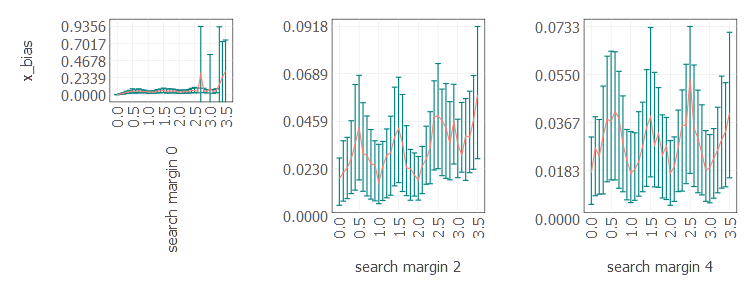

In [15]:
Gadfly.set_default_plot_size( 200mm, 80mm ); 

whatToPlot = "G"
data1 = (whatToPlot == "G") ? GSPevaluation[1] : NGSPevaluation[1]
data2 = (whatToPlot == "G") ? GSPevaluation[2] : NGSPevaluation[2]
data3 = (whatToPlot == "G") ? GSPevaluation[3] : NGSPevaluation[3]

xticks = Guide.xticks( label=true, ticks=collect(0:0.5:3.5), orientation=:vertical );

xticks  = Guide.xticks( label=true, ticks=collect(0:0.5:3.5), orientation=:vertical );
yticks1 = Guide.yticks( label=true, ticks=round.(collect(0.0:maximum(data1.up_xe)/4:maximum(data1.up_xe)),digits=4), orientation=:horizontal )
yticks2 = Guide.yticks( label=true, ticks=round.(collect(0.0:maximum(data2.up_xe)/4:maximum(data2.up_xe)),digits=4), orientation=:horizontal )
yticks3 = Guide.yticks( label=true, ticks=round.(collect(0.0:maximum(data3.up_xe)/4:maximum(data3.up_xe)),digits=4), orientation=:horizontal )


h13D = Compose.hstack(
    plot( 
        data1, th, x=:var1, y=:mean_bias,
        Geom.line, Geom.yerrorbar, ymin=:do_xe, ymax=:up_xe,
        Guide.xlabel("search margin 0"),
        xticks, yticks1,
        Coord.Cartesian( ymax=maximum(data1.up_xe), ymin=0 ), #minimum(gaussDF1.do_xe) ),
    ), 
    plot( 
        data2, th, x=:var1, y=:mean_bias,
        Geom.line, Geom.yerrorbar, ymin=:do_xe, ymax=:up_xe, 
        Guide.xlabel("search margin 2"), Guide.ylabel(nothing), 
        xticks, yticks2,
        Coord.Cartesian( ymax=maximum(data2.up_xe), ymin=minimum(data2.do_xe) ),
        ), 
    plot( 
        data3, th, x=:var1, y=:mean_bias,
        Geom.line, Geom.yerrorbar, ymin=:do_xe, ymax=:up_xe, 
        Guide.xlabel("search margin 4"), Guide.ylabel(nothing), 
        xticks, yticks3,
        Coord.Cartesian( ymax=maximum(data3.up_xe), ymin=minimum(data3.do_xe) ),
    ), 
)

false && Compose.draw( Compose.PDF( "translation3D$(whatToPlot)dens10.pdf", 170mm, 140mm, dpi=250 ), h13D  ); 

h13D

### 2D PIV evaluation: Particle density and Interrogation area size

In [12]:
# 200 x 200 image with 1000 particles of radius 2.0. 
sp = quickPIV.setSynthParameters( w=200, h=200, d=1, dens=10, i0=255.0, dt=2.0, th=Inf, err=255.0*0.001, rad=0  );

# (2,2) translation
tp = quickPIV.setTransformParameters( means=( 2.0, 2.0 ), vars=( eps(Float64), eps(Float64) ), cov_ratio=(0.0,) );  

# changing particle density between 1 and 10000 particles per interrogation area
mp = quickPIV.setMetaParameters( metaloop=50, var=:dens, min=1.0, max=1000.0, repeats=1000 ); 

mps = [ quickPIV.setMetaParameters( metaloop=50, var=:dens, min=1.0, max=200.0 , repeats=100 ), 
        quickPIV.setMetaParameters( metaloop=50, var=:dens, min=1.0, max=600.0 , repeats=100 ),
        quickPIV.setMetaParameters( metaloop=50, var=:dens, min=1.0, max=1000.0, repeats=100 )
      ]

DENSevaluation = DataFrame(); 
count = 1; 
# Evaluating translation strength at 3 different interrogation area sizes
for IA in [ 10, 15, 20 ]
    
    pp = quickPIV.setPIVParameters( corr="diff", interSize=IA, searchMargin=0, peak="gaussian", sigNoise="" ); 

    _, results  = quickPIV.evaluate( mps[count], sp, pp, tp, silent=true );
    
    # subplot title
    results.alg   = repeat( ["IA $(IA)",], size( results, 1 ) );
    # errorbar top and low values
    results.up_xe = results[:,:mean_bias] .+ results[:,:mean_error]./2;
    results.do_xe = results[:,:mean_bias] .- results[:,:mean_error]./2;
    
    # concatenating result into one DataFrame (IAevaluation)
    DENSevaluation  = vcat( DENSevaluation, results )
    count += 1; 
end


2D PIV evaluation of dens
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,
variable values: [1.0, 5.0, 9.0, 13.0, 17.0, 21.0, 25.0, 29.0, 33.0, 37.0, 41.0, 45.0, 49.0, 53.0, 57.0, 61.0, 65.0, 69.0, 73.0, 77.0, 81.0, 85.0, 89.0, 93.0, 97.0, 100.0, 104.0, 108.0, 112.0, 116.0, 120.0, 124.0, 128.0, 132.0, 136.0, 140.0, 144.0, 148.0, 152.0, 156.0, 160.0, 164.0, 168.0, 172.0, 176.0, 180.0, 184.0, 188.0, 192.0, 196.0, 200.0]

2D PIV evaluation of dens
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,
variable values: [1.0, 13.0, 25.0, 37.0, 49.0, 61.0, 73.0, 85.0, 97.0, 109.0, 121.0, 133.0, 145.0, 157.0, 169.0, 181.0, 193.0, 205.0, 217.0, 229.0, 241.0, 253.0, 265.0, 277.0, 289.0, 300.0, 312.0, 324.0, 336.0, 348.0, 360.0, 372.0, 384.0, 396.0, 408.0, 420.0, 432.0, 444.0, 456.0, 468.0, 480.0, 492.0, 504.0, 51

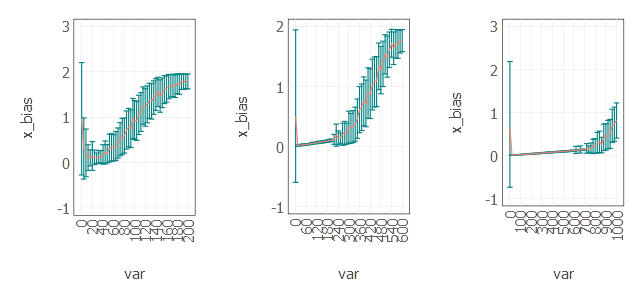

In [13]:
Gadfly.set_default_plot_size( 170mm, 80mm ); 

xlbl = Gadfly.Guide.xlabel("Particle density", orientation=:horizontal )
xtck = Gadfly.Guide.xticks(label=true, ticks=collect(0:100:1000), orientation=:vertical )

p5 = Gadfly.plot( DENSevaluation, 
                  xgroup=:alg, x=:var, y=:mean_bias,  #size =:rand_ex,
                  th, xlbl,
                  Geom.subplot_grid( Geom.line, Geom.yerrorbar, xtck ),
                  ymin=:do_xe, ymax=:up_xe,
                 )

xtcks = [ Gadfly.Guide.xticks(label=true, ticks=collect(0:20:200), orientation=:vertical ), 
          Gadfly.Guide.xticks(label=true, ticks=collect(0:60:600), orientation=:vertical ),
          Gadfly.Guide.xticks(label=true, ticks=collect(0:100:1000), orientation=:vertical )
        ]

IA10 = first( DENSevaluation, 51 )
IA15 = last( first( DENSevaluation, 102 ), 51 )
IA20 = last( DENSevaluation, 51 )

p52D10 = Gadfly.plot( IA10, x=:var, y=:mean_bias, th, Geom.line, Geom.yerrorbar,
                     xtcks[1], ymin=:do_xe, ymax=:up_xe )
p52D15 = Gadfly.plot( IA15, x=:var, y=:mean_bias, th, Geom.line, Geom.yerrorbar,
                     xtcks[2], ymin=:do_xe, ymax=:up_xe )
p52D20 = Gadfly.plot( IA20, x=:var, y=:mean_bias, th, Geom.line, Geom.yerrorbar,
                     xtcks[3], ymin=:do_xe, ymax=:up_xe )

h = hstack( p52D10, p52D15, p52D20 ) 

false && Compose.draw( Compose.PDF( "density2D.pdf", 170mm, 80mm, dpi=250 ), h )

h

### 3D PIV evaluation: Particle density and Interrogation area size

In [17]:
# 200 x 200 image with 1000 particles of radius 2.0. 
sp = quickPIV.setSynthParameters( w=100, h=100, d=100, dens=10, i0=255.0, dt=2.0, th=Inf, err=255.0*0.001, rad=0  );

# (2,2) translation
tp = quickPIV.setTransformParameters( means=( 2.0, 2.0, 2.0 ), vars=( eps(Float64), eps(Float64), eps(Float64) ), 
                                   cov_ratio=( 0.0, 0.0, 0.0 ) );  

# changing particle density between 1 and 10000 particles per interrogation area
mp = quickPIV.setMetaParameters( metaloop=50, var=:dens, min=1.0, max=5000.0, repeats=5 ); 

mps = [ quickPIV.setMetaParameters( metaloop=100, var=:dens, min=1.0, max=500.0, repeats=5 ),
        quickPIV.setMetaParameters( metaloop=50, var=:dens, min=1.0, max=2000.0, repeats=5 ),
        quickPIV.setMetaParameters( metaloop=50, var=:dens, min=1.0, max=5000.0, repeats=5 ),
      ]
DENSevaluation = DataFrame(); 

count = 1; 

# Evaluating translation strength at 3 different interrogation area sizes
for IA in [ 10, 15, 20 ]
    
    pp = quickPIV.setPIVParameters( corr="fft", interSize=IA, searchMargin=0, peak="gaussian", sigNoise="" ); 

    _, results  = quickPIV.evaluate( mps[count], sp, pp, tp, silent=true );
    
    # subplot title
    results.alg   = repeat( ["IA $(IA)",], size( results, 1 ) );
    # errorbar top and low values
    results.up_xe = results[:,:mean_bias] .+ results[:,:mean_error]./2;
    results.do_xe = results[:,:mean_bias] .- results[:,:mean_error]./2;
    
    # concatenating result into one DataFrame (IAevaluation)
    DENSevaluation  = vcat( DENSevaluation, results )
    
    count += 1
end


3D PIV evaluation of dens
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,
variable values: [1.0, 6.0, 11.0, 16.0, 21.0, 26.0, 31.0, 36.0, 41.0, 46.0, 51.0, 56.0, 61.0, 66.0, 71.0, 76.0, 81.0, 86.0, 91.0, 96.0, 101.0, 106.0, 111.0, 116.0, 121.0, 126.0, 131.0, 136.0, 141.0, 146.0, 151.0, 156.0, 161.0, 166.0, 171.0, 176.0, 181.0, 186.0, 191.0, 196.0, 201.0, 206.0, 211.0, 216.0, 221.0, 226.0, 231.0, 236.0, 241.0, 246.0, 250.0, 255.0, 260.0, 265.0, 270.0, 275.0, 280.0, 285.0, 290.0, 295.0, 300.0, 305.0, 310.0, 315.0, 320.0, 325.0, 330.0, 335.0, 340.0, 345.0, 350.0, 355.0, 360.0, 365.0, 370.0, 375.0, 380.0, 385.0, 390.0, 395.0, 400.0, 405.0, 410.0, 415.0, 420.0, 425.0, 430.0, 435.0, 440.0, 445.0, 450.0, 455.0, 460.0, 465.0, 470.0, 475.0, 480.0, 485

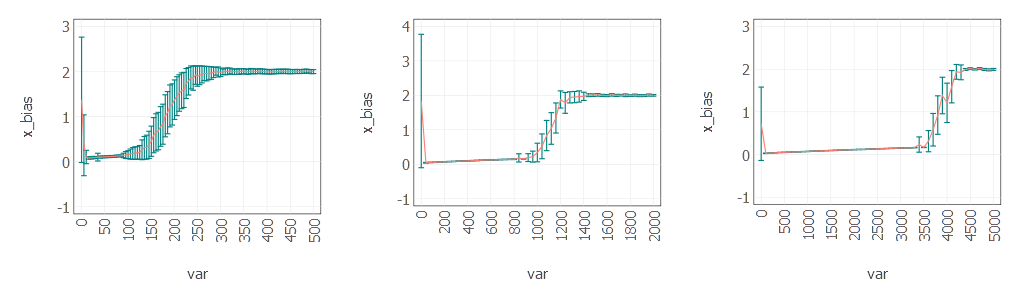

In [18]:
Gadfly.set_default_plot_size( 270mm, 80mm ); 

xlbl = Gadfly.Guide.xlabel("Particle density", orientation=:horizontal )
xtck = Gadfly.Guide.xticks(label=true, ticks=collect(0:50:5000), orientation=:vertical )
xtcks = [ Gadfly.Guide.xticks(label=true, ticks=collect(0:50:500), orientation=:vertical ), 
          Gadfly.Guide.xticks(label=true, ticks=collect(0:200:2000), orientation=:vertical ),
          Gadfly.Guide.xticks(label=true, ticks=collect(0:500:5000), orientation=:vertical )
        ]

p53D = Gadfly.plot( DENSevaluation, 
                    xgroup=:alg, x=:var, y=:mean_bias,  #size =:rand_ex,
                    th, xlbl,
                    Geom.subplot_grid( Geom.line, Geom.yerrorbar, xtck ),
                    ymin=:do_xe, ymax=:up_xe,
                   )

IA10 = first( DENSevaluation, 101 )
IA15 = last( first( DENSevaluation, 152 ), 51 )
IA20 = last( DENSevaluation, 51 )

p53D10 = Gadfly.plot( IA10, x=:var, y=:mean_bias, th, Geom.line, Geom.yerrorbar,
                     xtcks[1], ymin=:do_xe, ymax=:up_xe )
p53D15 = Gadfly.plot( IA15, x=:var, y=:mean_bias, th, Geom.line, Geom.yerrorbar,
                     xtcks[2], ymin=:do_xe, ymax=:up_xe )
p53D20 = Gadfly.plot( IA20, x=:var, y=:mean_bias, th, Geom.line, Geom.yerrorbar,
                     xtcks[3], ymin=:do_xe, ymax=:up_xe )

h = hstack( p53D10, p53D15, p53D20 ) 

false && Compose.draw( Compose.PDF( "density3D.pdf", 170mm, 80mm, dpi=250 ), h )

h

### 2D PIV Evaluation: particle radius

In [21]:
# 200 x 200 image with 1000 particles of radius 2.0. 
sp = quickPIV.setSynthParameters( w=200, h=200, d=1, dens=10, i0=255.0, dt=2.0, th=Inf, err=255.0*0.001, rad=0  );

# (2,2) translation
tp = quickPIV.setTransformParameters( means=( 2.0, 2.0 ), vars=( eps(Float64), eps(Float64) ), cov_ratio=(0.0,) ); 

# changing interrogation area between 1 and 20
mp = quickPIV.setMetaParameters( metaloop=38, var=:dt, min=1.0, max=20.0, repeats=1000 ); 

RADevaluation = DataFrame(); 

for IA in [ 10, 15, 20 ]
    
    pp = quickPIV.setPIVParameters( corr="fft", interSize=IA, searchMargin=0, peak="gaussian", sigNoise="" );
    
    _, results = quickPIV.evaluate( mp, sp, pp, tp, silent=true );

    results.alg   = repeat( ["IA $(IA)",], size( results, 1 ) ); 
    results.up_xe = results[:,:mean_bias] .+ results[:,:mean_error]./2;
    results.do_xe = results[:,:mean_bias] .- results[:,:mean_error]./2;

    RADevaluation = vcat( RADevaluation, results ); 
end

GC.gc()


2D PIV evaluation of dt
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,
variable values: [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0]

2D PIV evaluation of dt
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,
variable values: [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0]

2D PIV evaluation of dt
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,
variable values: [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 1

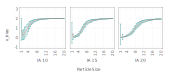

In [22]:
Gadfly.set_default_plot_size( 170mm, 80mm ); 

xlbl = Gadfly.Guide.xlabel("Particle Size", orientation=:horizontal )
ytck = Gadfly.Guide.yticks(label=true, ticks=collect(0:4), orientation=:horizontal )
xtck = Gadfly.Guide.xticks(label=true, ticks=[1,4,8,12,16,20], orientation=:vertical )

p8 = Gadfly.plot( RADevaluation, xgroup=:alg, x=:var, y=:mean_bias,  #size =:rand_ex,
                  th, xlbl,
                  Geom.subplot_grid( 
                    Geom.line, Geom.yerrorbar, xtck, 
                    Coord.Cartesian( ymax=maximum(3.0), ymin=minimum(-1) ), 
                  ),
                  ymin=:do_xe, 
                  ymax=:up_xe,
                 
                  #color=:alg, 
                 )

false && Compose.draw( Compose.PDF( "psizeIA2D.pdf", 170mm, 80mm, dpi=300 ), p8 )

p8

### 3D PIV Evaluation: particle radius

In [24]:
# 200 x 200 image with 1000 particles of radius 2.0. 
sp = quickPIV.setSynthParameters( w=100, h=100, d=100, dens=10, i0=255.0, dt=2.0, th=Inf, err=255.0*0.001, rad=0  );

# (2,2) translation
tp = quickPIV.setTransformParameters( means=( 2.0, 2.0, 2.0 ), vars=( eps(Float64), eps(Float64), eps(Float64) ), cov_ratio=(0.0, 0.0, 0.0) ); 

# changing interrogation area between 1 and 20
mp = quickPIV.setMetaParameters( metaloop=38, var=:dt, min=1.0, max=20.0, repeats=5 ); 

RADevaluation3D = DataFrame(); 

for IA in [ 10, 15, 20 ]
    
    pp = quickPIV.setPIVParameters( corr="fft", interSize=IA, searchMargin=0, peak="gaussian", sigNoise="" );
    
    _, results = quickPIV.evaluate( mp, sp, pp, tp, silent=true );

    results.alg   = repeat( ["IA $(IA)",], size( results, 1 ) ); 
    results.up_xe = results[:,:mean_bias] .+ results[:,:mean_error]./2;
    results.do_xe = results[:,:mean_bias] .- results[:,:mean_error]./2;

    RADevaluation3D = vcat( RADevaluation3D, results ); 
end

GC.gc()


3D PIV evaluation of dt
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,
variable values: [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0]

3D PIV evaluation of dt
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,
variable values: [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0]

3D PIV evaluation of dt
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,
variable values: [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 1

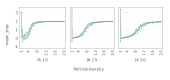

In [25]:
Gadfly.set_default_plot_size( 170mm, 80mm ); 

xlbl = Gadfly.Guide.xlabel("Particle density", orientation=:horizontal )
ytck = Gadfly.Guide.yticks(label=true, ticks=0:4, orientation=:horizontal )
xtck = Gadfly.Guide.xticks(label=true, ticks=[1,4,8,12,16,20], orientation=:vertical )

p83D = Gadfly.plot( RADevaluation3D, xgroup=:alg, x=:var, y=:mean_bias,  #size =:rand_ex,
                  th, xlbl,
                  Geom.subplot_grid( Geom.line, Geom.yerrorbar, xtck, 
                    Coord.Cartesian( ymax=maximum(RADevaluation3D.up_xe), ymin=minimum(-1) ), 
                  ),
                  ymin=:do_xe, 
                  ymax=:up_xe,
                 
                  #color=:alg, 
                 )

false && Compose.draw( Compose.PDF( "psizeIA3D.pdf", 170mm, 80mm, dpi=300 ), p83D )

p83D

### Performance in Julia: 
Computing execution time of FFT through FFTW.jl below


In [3]:
using FFTW, PyPlot, quickPIV

┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /madia/marc/MountMarc/.julia/packages/Gadfly/09PWZ/src/mapping.jl:228


In [4]:
IA0, IAmax, n = 10, 60, 1000;

JLtimes = zeros( length(IA0:IAmax) ); 

for IA in IA0:IAmax

    corr_size   = (IA, IA); 
    corr_matrix = zeros( Float64, corr_size );
    i1          = zeros( Complex{Float64}, corr_size ); 
    i2          = zeros( Complex{Float64}, corr_size );
    plan        =  FFTW.plan_fft!( i1, flags=FFTW.MEASURE ); 
    iplan       = FFTW.plan_bfft!( i1, flags=FFTW.MEASURE );
    
    ts = zeros( n ); # array of "n" time measurements
    
    for e in 1:n
        t1 = Base.time_ns(); 
        PIV3D.crossCorrelation!( PIV3D.FFT(), i2, i1, corr_matrix, plan, iplan )
        ex = Base.time_ns() - t1;
        ts[e] = ex;
    end
    
    # the minimum execution time from all "n" repeats is taken as the 
    # execution time for a given interrogation area size
    JLtimes[IA-IA0+1] = minimum(ts)/1000; 
    
end

Loading CPP and Python exeuction times: 
<br>   1-. Run cpp and python evaluation scripts.
<br>   2-. Loading this data from Julia

In [7]:
CPPtimes = []; 

open("/home/marc/Desktop/pyTimes3.txt") do file
    for ln in eachline(file)
        push!(CPPtimes, parse( Float64, ln ) )
    end
end

PYtimes = [];

open("/home/marc/Desktop/pyTimes2.txt") do file
    for ln in eachline(file)
        push!(PYtimes, parse( Float64, ln ) )
    end
end

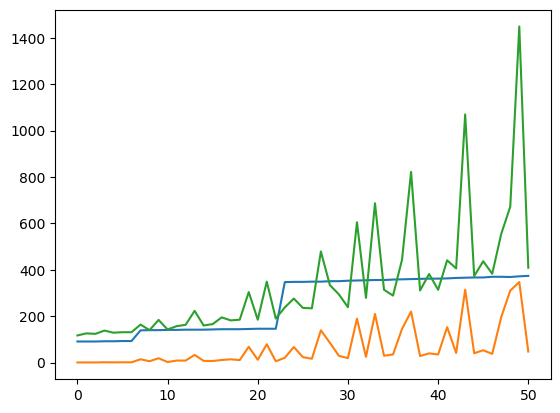

In [8]:
PyPlot.plot( CPPtimes );
PyPlot.plot( JLtimes );
PyPlot.plot( PYtimes );